In [2]:

import pandas as pd


import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets, preprocessing, metrics

/var/folders/yt/kpjs1sb134xbh0gd8yy86l5r0000gn/T/ipykernel_65029/3511596069.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("./worldcup.csv",
 index_col= None, na_values= ['NA'])

In [4]:
df.shape

(852, 12)

In [5]:
df.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

In [6]:
df.head()

,Year,Date,Time,Round,Stadium,City,Country,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,Uruguay,France,4,1,Mexico,
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,Uruguay,USA,3,0,Belgium,
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Uruguay,Yugoslavia,2,1,Brazil,
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Uruguay,Romania,3,1,Peru,
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Uruguay,Argentina,1,0,France,


In [7]:
df.isnull().sum()

Year           0
Date           0
Time           0
Round          0
Stadium        0
City           0
Country        0
HomeTeam       0
HomeGoals      0
AwayGoals      0
AwayTeam       0
Observation    0
dtype: int64

In [8]:
df = df.drop(['Time', 'Observation'], axis=1)

In [9]:
df.head()

,Year,Date,Round,Stadium,City,Country,HomeTeam,HomeGoals,AwayGoals,AwayTeam
0,1930,13-Jul-30,Group 1,Pocitos,Montevideo,Uruguay,France,4,1,Mexico
1,1930,13-Jul-30,Group 4,Parque Central,Montevideo,Uruguay,USA,3,0,Belgium
2,1930,14-Jul-30,Group 2,Parque Central,Montevideo,Uruguay,Yugoslavia,2,1,Brazil
3,1930,14-Jul-30,Group 3,Pocitos,Montevideo,Uruguay,Romania,3,1,Peru
4,1930,15-Jul-30,Group 1,Parque Central,Montevideo,Uruguay,Argentina,1,0,France


In [10]:
df.describe()

,Year,HomeGoals,AwayGoals
count,852.000000,852.000000,852.000000
mean,1985.089202,1.811033,1.022300
std,22.448825,1.610255,1.087573
min,1930.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000
50%,1990.000000,2.000000,1.000000
75%,2002.000000,3.000000,2.000000
max,2014.000000,10.000000,7.000000


In [11]:
mean_home_goals = df['HomeGoals'].mean()
mean_away_goals = df['AwayGoals'].mean()

mean_away_goals
mean_home_goals

1.8110328638497653

In [12]:
# Assuming 'HomeTeam', 'AwayTeam' are the columns for teams and 'HomeGoals', 'AwayGoals' for goals
home_goals = df.groupby('HomeTeam')['HomeGoals'].sum()
away_goals = df.groupby('AwayTeam')['AwayGoals'].sum()

# Combine the goals for teams who have played both home and away
total_goals = home_goals.add(away_goals, fill_value=0).astype(int)

In [13]:
# Assuming 'HomeTeam', 'AwayTeam' are the columns for teams and 'HomeGoals', 'AwayGoals' for goals
home_goals = df.groupby('HomeTeam')['HomeGoals'].sum()
away_goals = df.groupby('AwayTeam')['AwayGoals'].sum()

# Combine the goals for teams who have played both home and away
total_goals = home_goals.add(away_goals, fill_value=0).astype(int)

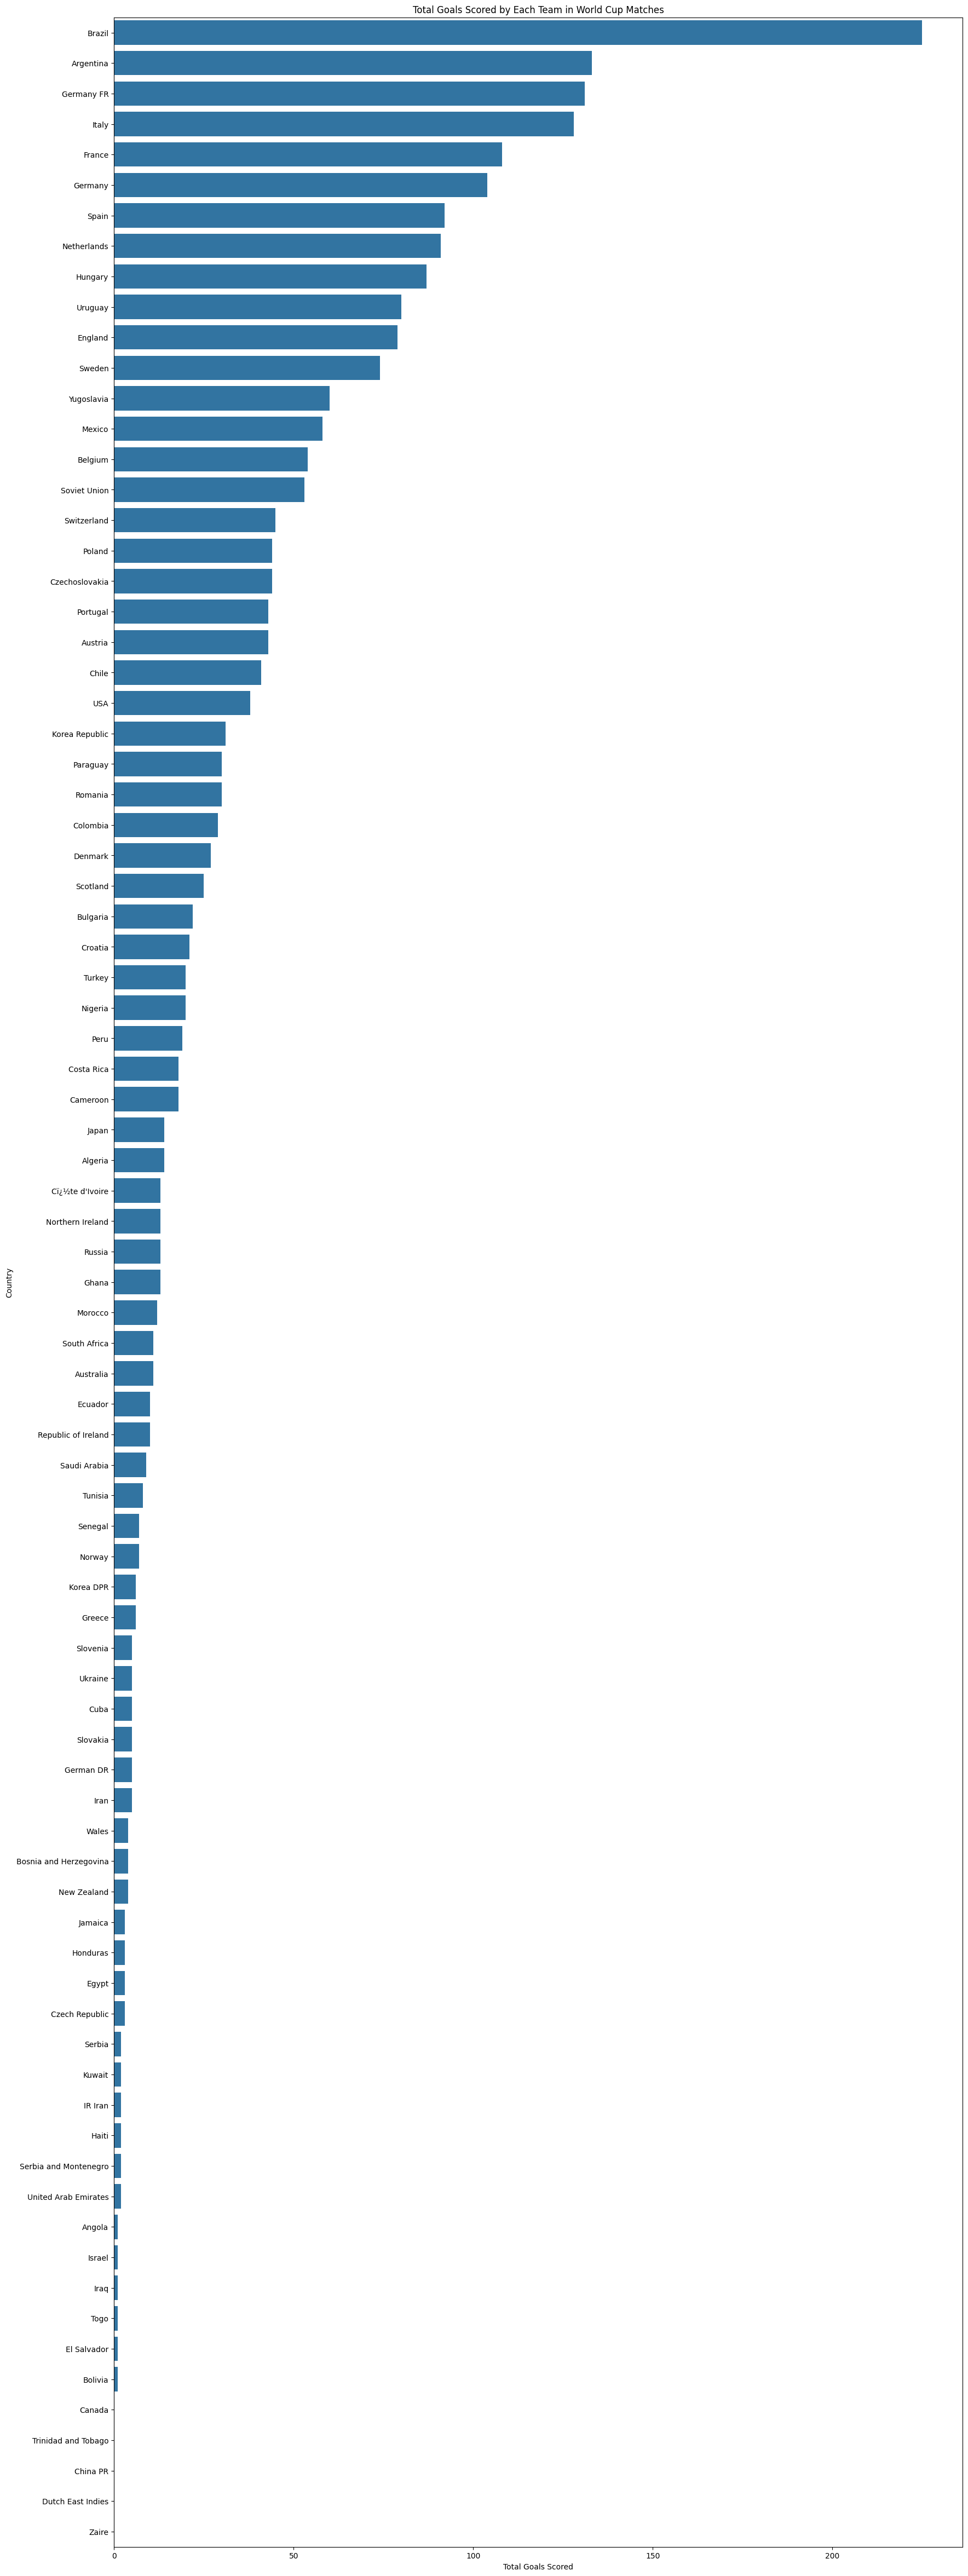

In [14]:
sorted_goals = total_goals.sort_values(ascending=False)


plt.figure(figsize=(20, 60))  
sns.barplot(x=sorted_goals.values, y=sorted_goals.index)
plt.xlabel('Total Goals Scored')
plt.ylabel('Country')
plt.title('Total Goals Scored by Each Team in World Cup Matches')
plt.show()

In [15]:
#Dropping teams that havent scored any goals
teams_with_goals = total_goals[total_goals > 0]

In [16]:
# show the top 10 teams with the most goals
teams_with_goals.nlargest(10)

Brazil         225
Argentina      133
Germany FR     131
Italy          128
France         108
Germany        104
Spain           92
Netherlands     91
Hungary         87
Uruguay         80
dtype: int64

In [17]:
# show the top 10 teams with the least goals
teams_with_goals.nsmallest(10)

Angola         1
Bolivia        1
El Salvador    1
Iraq           1
Israel         1
Togo           1
Haiti          2
IR Iran        2
Kuwait         2
Serbia         2
dtype: int64

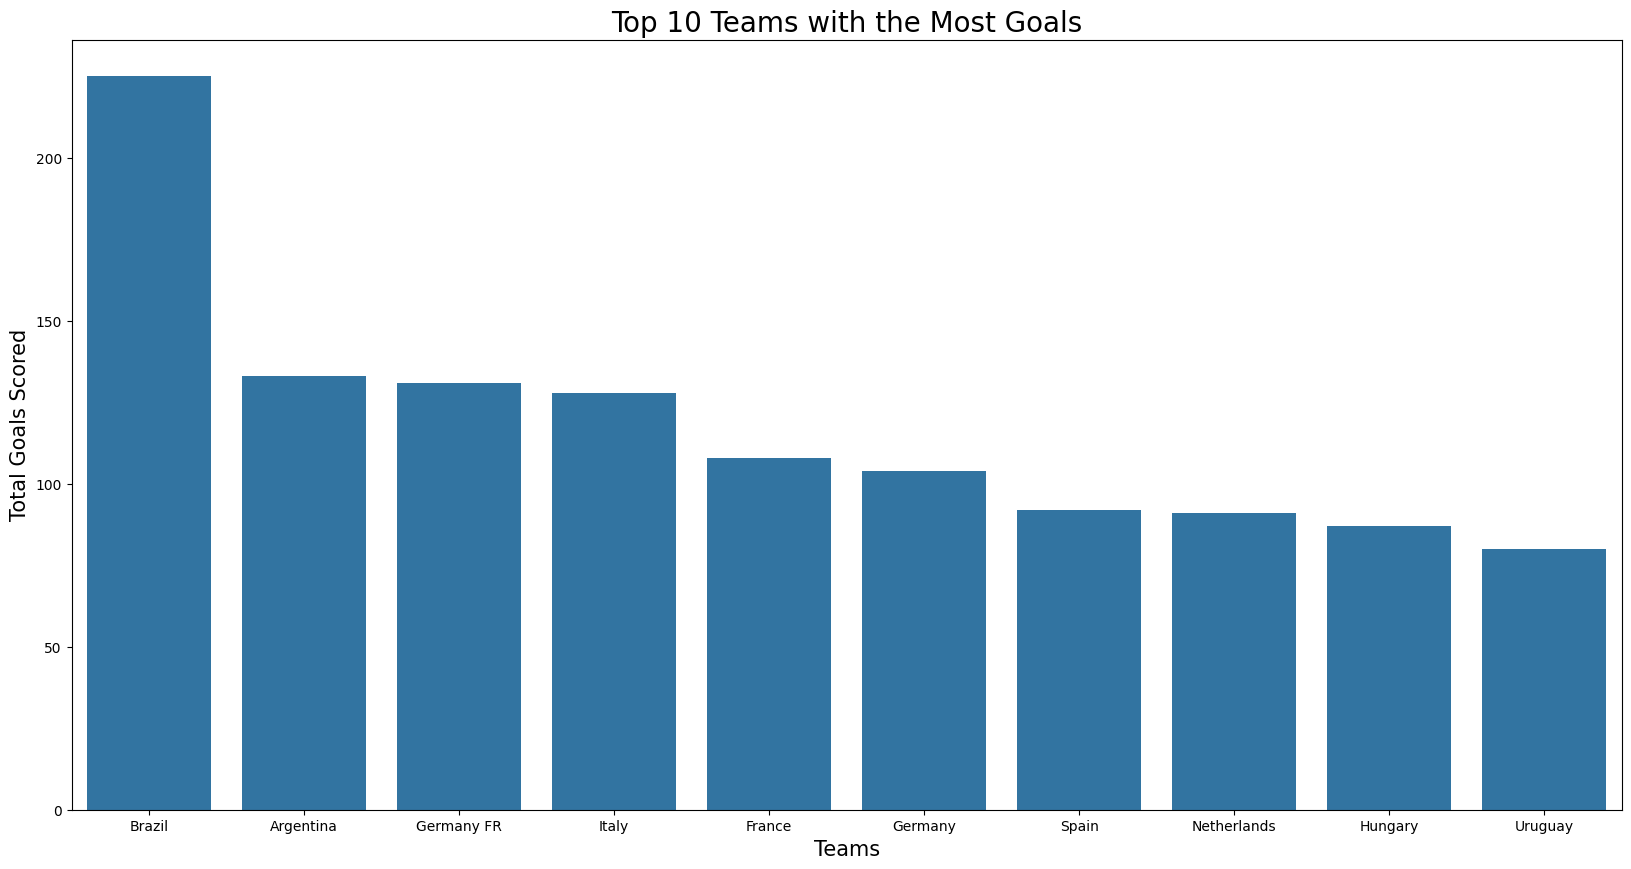

In [18]:
# showcase the top 10 teams with the most goals
plt.figure(figsize=(20, 10)) 


top_teams = sorted_goals.head(10)  
sns.barplot(x=top_teams.index, y=top_teams.values)  


plt.xlabel('Teams', fontsize=15)
plt.ylabel('Total Goals Scored', fontsize=15)
plt.title('Top 10 Teams with the Most Goals', fontsize=20)

plt.show()  

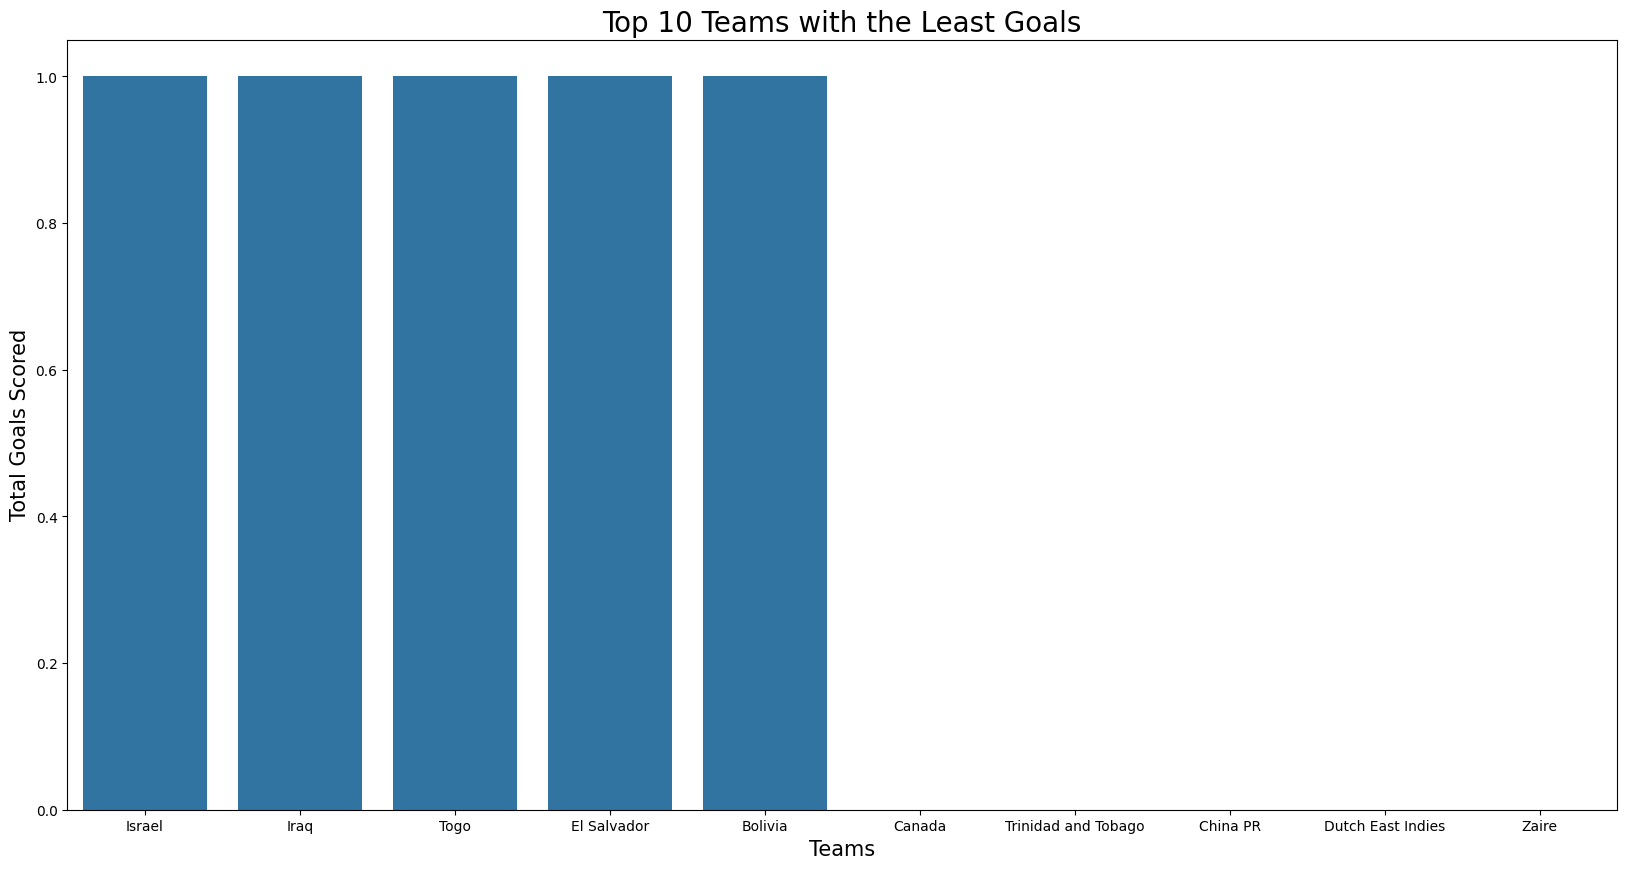

In [19]:
# show the top 10 teams with the least goals in bar plot
plt.figure(figsize=(20, 10))
bottom_teams = sorted_goals.tail(10)

sns.barplot(x=bottom_teams.index, y=bottom_teams.values)

plt.xlabel('Teams', fontsize=15)
plt.ylabel('Total Goals Scored', fontsize=15)
plt.title('Top 10 Teams with the Least Goals', fontsize=20)

plt.show()


In [30]:
# Create 2 new columns for the total goals scored and conceded by each team


goals_conceded_home = df.groupby('HomeTeam')['AwayGoals'].sum()
goals_conceded_away = df.groupby('AwayTeam')['HomeGoals'].sum()

        
total_goals_conceded = goals_conceded_home.add(goals_conceded_away, fill_value=0).astype(int)


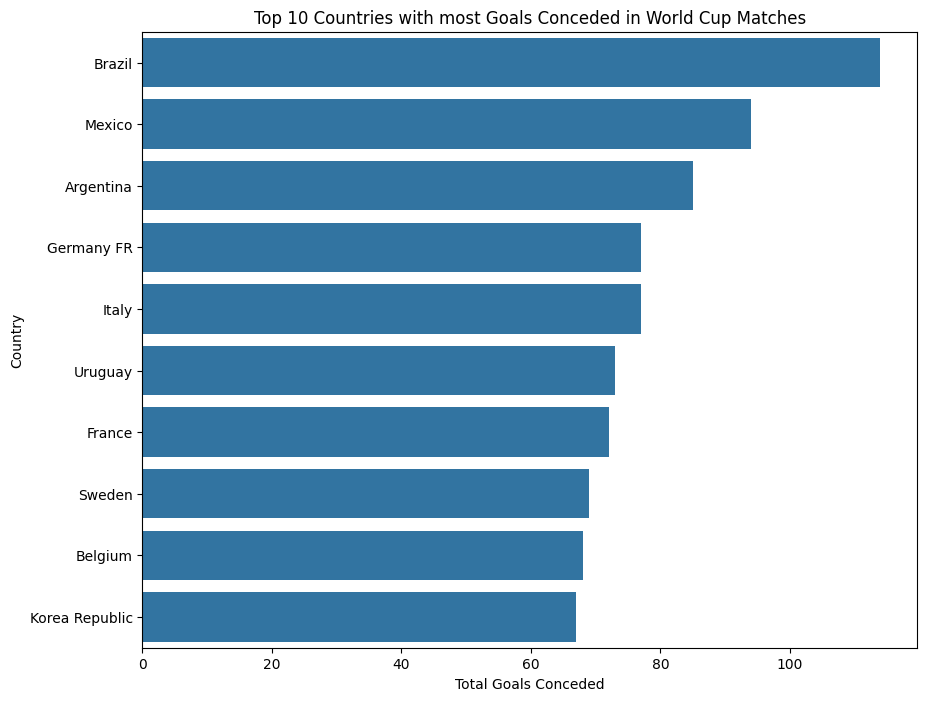

In [28]:
# Sort the teams by the most goals conceded
sorted_goals_conceded = total_goals_conceded.sort_values(ascending=False)
most_goals_conceded =  sorted_goals_conceded.head(10)

# Create a bar plot for the teams with the most goals conceded
plt.figure(figsize=(10, 8))
sns.barplot(x=most_goals_conceded, y=most_goals_conceded.index)
plt.xlabel('Total Goals Conceded')
plt.ylabel('Country')
plt.title('Top 10 Countries with most Goals Conceded in World Cup Matches')
plt.show()



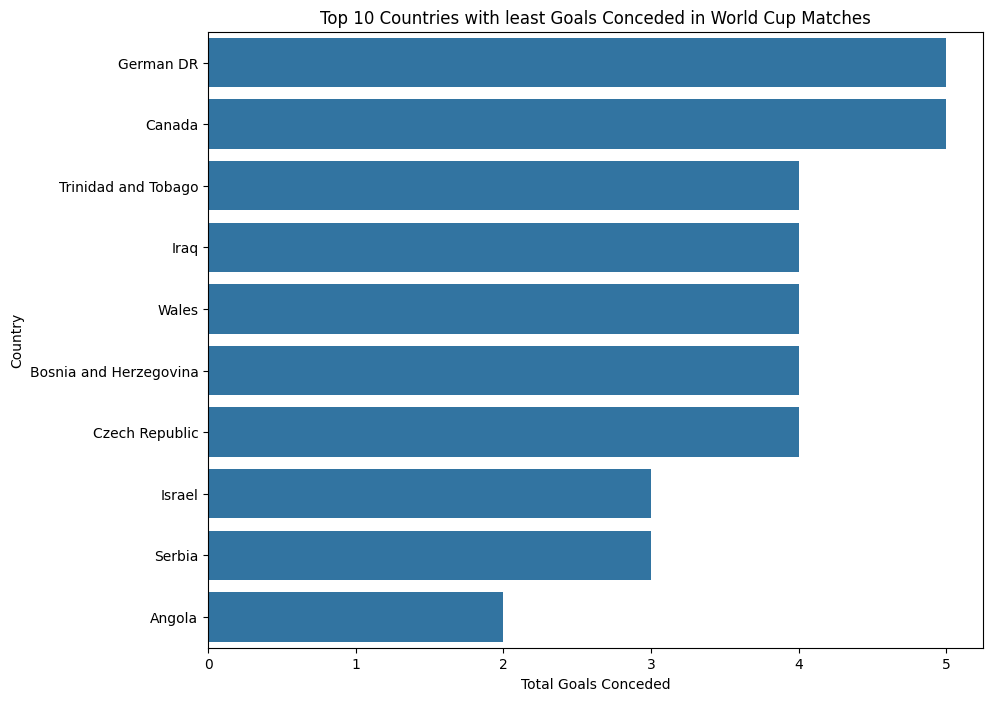

In [31]:

least_goals_conceded =  sorted_goals_conceded.tail(10)

# Create a bar plot for the teams with the least goals conceded
plt.figure(figsize=(10, 8))
sns.barplot(x=least_goals_conceded, y=least_goals_conceded.index)
plt.xlabel('Total Goals Conceded')
plt.ylabel('Country')
plt.title('Top 10 Countries with least Goals Conceded in World Cup Matches')
plt.show()